In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import steplib as msl

In [2]:
meter_df = pd.read_csv("DataGathering/output.csv")
state_df = pd.read_csv('output.csv')
steps_df = pd.read_csv("DataGathering/steps.csv")

In [3]:
start = 0
end = len(meter_df["datetime"])

In [4]:
def chart(data_in, states):
    x=pd.to_datetime(meter_df['datetime'])[start:end]
    y=data_in [start:end]
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.title(data_in.name)
    plt.xlabel('datetime')
    plt.ylabel('accx')
    #show x label every 800
    plt.xticks(x[::800])
    plt.xticks(rotation=90)
    #add rectangles

    plt.show()

In [5]:
def chart2(data_in):
    x=pd.to_datetime(meter_df['datetime'])[start:end]
    y=data_in[start:end]
    plt.figure(figsize=(10,5))
    plt.plot(x,y, color='red', marker='o')
    plt.xlabel('datetime')
    plt.ylabel('accx')
    #show x label every 800
    plt.xticks(x[::800])
    plt.xticks(rotation=90)
    #add rectangles
    for i in range(len(steps_df.iloc[:,0])):
        plt.axvline(x = pd.to_datetime(steps_df.iloc[:,0][i]), color = 'b', label = 'axvline - full height')
    plt.show()

In [6]:
steps_df.iloc[:,0][0]

'2023-12-12 17:30:59.888'

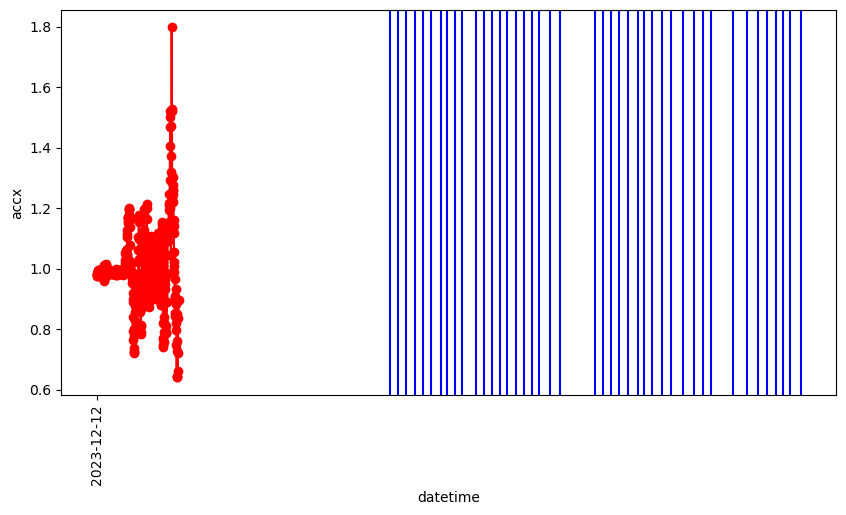

In [7]:
data = meter_df['accx']**2 + meter_df['accy']**2 + meter_df['accz']**2
data = data.apply(lambda x: x**0.5)
%matplotlib inline
chart2(data)


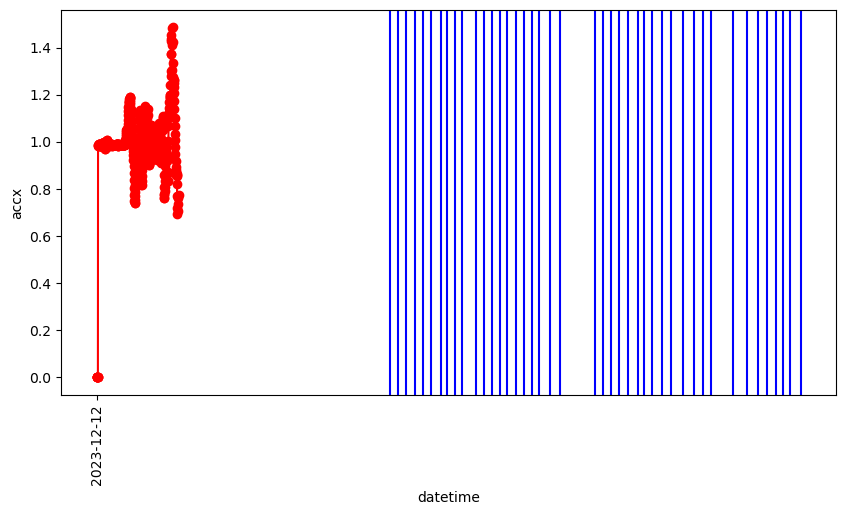

In [8]:
#apply filter 0.0158467315853596	0.0457943754888393	0.121235976281198	0.200244477464560	0.233756878360087	0.200244477464560	0.121235976281198	0.0457943754888393	0.0158467315853596
data = msl.apply_filter(data, [0.0158467315853596,0.0457943754888393,0.121235976281198,0.200244477464560,0.233756878360087,0.200244477464560,0.121235976281198,0.0457943754888393,0.0158467315853596])
chart2(data)

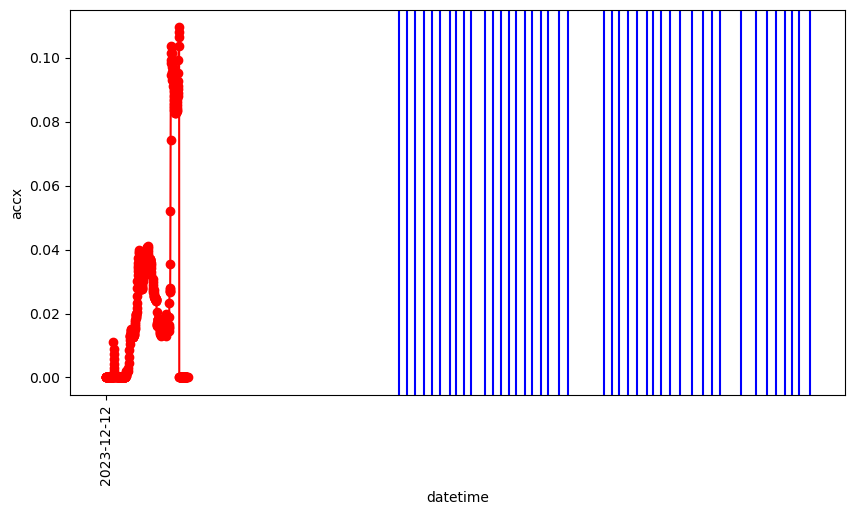

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01102075781038704, 0.00904453046678921, 0.007263394311056169, 0.00567777686191584, 0.004287965909414567, 0.0030937254028560648, 0.002094798014211019, 0.0012907961709822731, 0.0006816115036117122, 0.00026750629247815827, 0.0002657651572949966, 0.0002651177592116128, 0.00026570062570704467, 0.0003248319253408187, 0.00037514097024173156, 0.0003176801212480195, 0.0002374276803169881, 0.00019394754787177367, 0.000192883560144332, 0.00019142973370616468, 0.00019226367840075376, 0.0001960177715661535, 0.0001948999668427804, 0.00019414368987987255, 0.00019407879220318145, 0.00019471432040322524, 0.00019584359194742482, 0.00019701622194749646, 0.00019769673196828015, 0.00019740706964517334, 0.000195991281255946, 0.00019368495237996955, 0.00019116522457033342, 0.00018926684932349467, 0.00018858565707772503, 0.00018919152840053558, 0.000190750882

In [9]:
data = msl.modified_pan_tompkins_scoring(data, 50)
chart2(data)
print(data)

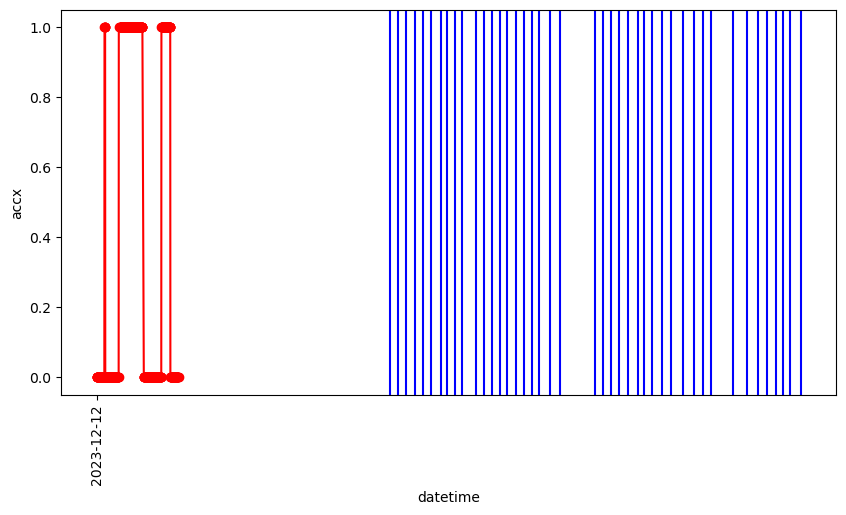

In [10]:
data = msl.detect_outliers(data, 1.2)
chart2(data)

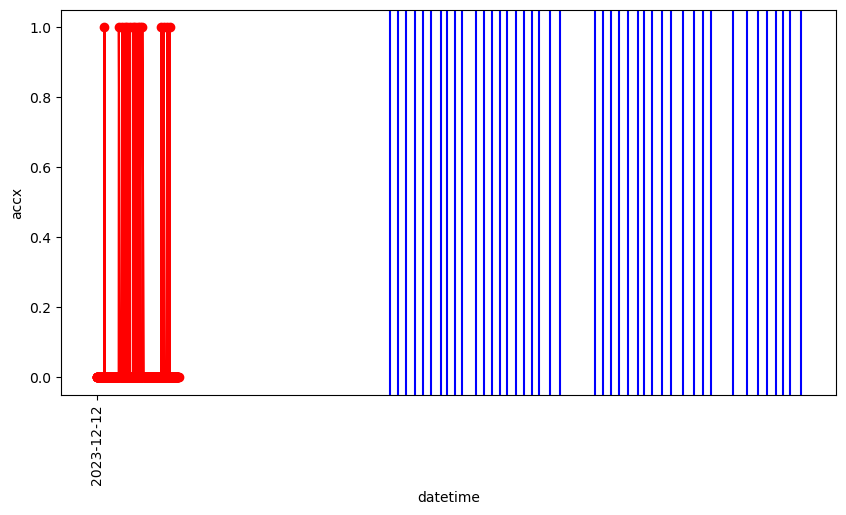

In [11]:
%matplotlib inline
data = msl.post_processing(data, 200, 75)
chart2(data)